NLP Foundational Project
=====

##### The project consists of three parts.
1) Part A: Text preprocessing
<br>
2) Part B: N-grams
<br>
3) Part C: Language models

Part A: Text preprocessing
======

##### The first part in Part A is using regular expressions to parse and clean the the texts "signal-news1.jsonl".
The following cleaning is required:
<br>
a) Lowercase all the text;
<br>
b) Keep only alphanumeric characters and spaces;
<br>
c) Remove words with 3 characters or fewer;
<br>
d) Remove numbers that are fully made of digits (e.g. remove '5' but not '5pm');
<br>
e) Remove URLs.

In the code, the preprocessing steps above are done in different orders. For the unicode strings, we need to use *unicodedata.normalize* to normalise the unicode first. Then after lowercasing all the text, URLs are removed for differnt forms, including "<u>https://</u>", "<u>http://</u>", "<u>www.*</u>" and "<u>*.com/.gov/.org</u> etc.". Then non-alphanumeric characters are removed except for spaces using regular expressions. 

In [2]:
import json
import unicodedata
import re
import nltk
#nltk.download()
#nltk.download('wordnet')

data = []

with open('signal-news1.jsonl','r') as news:
	for line in news:
		line = line.lower()  ## Lower case
		line = json.loads(line)
		line = line["content"]
		line = str(unicodedata.normalize('NFKC', line).encode('ASCII', 'ignore'))
		## Remove url
		Part_d = re.compile(r'[https]+://[\S]+|[http]+://[\S]+|[www]+[.][\S]+[.][\S]+|[\S]+[.][\S]+')     
		line = Part_d.sub(' ', line)
		## Remove non alphanumeric charcters
		Part_a = re.compile('[^0-9a-z ]')  
		line = Part_a.sub(' ',line)
		data.append(line)
#print(data[0])

We then remove the words with 3 characters or fewer and the numbers fully made of digits together. It is worth noticing that there are only alphanumeric characters left in the text now.
<br>
After these steps, we have finished the preprocessing of the given text.

In [3]:
one_list = []
for i in data:
	## Remove words with 3 characters or fewer
	## Remove numbers fully made of digits
	Part_b_and_c = re.compile(r'\W*\b\w{1,3}\b|\b\d+\b')
	mystring = Part_b_and_c.sub('', i)
	one_list.append(mystring)

Part A-2: English Lemmatiser
======

##### The second part in Part A is using an English lemmatiser to process the remaining words.
We firstly import a package from *nltk.stem*, called *WordNetLemmatizer*. Then apply the lemmatizer to each word in each story line and form a new list of lemmatised news stories, naming it as *story_list*. 

In [5]:
## Use English lemmatiser
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
story_list = []
for i in one_list:
	mylist = [lemma.lemmatize(x) for x in re.findall(r'\S+', i)]
	mystring2 = " ".join(mylist)
	story_list.append(mystring2)

#### If part-of-speech constant is considered:
from nltk.corpus import wordnet
lemma = WordNetLemmatizer()
story_list = []
for i in one_list:
	tag_list = nltk.pos_tag(word_tokenize(i))
	#tag_list = dict([(x, get_wordnet_pos(y)) for x, y in tag_list])
	tag_list = dict([(tuple[0], wordnet.ADJ) if tuple[1].startswith('J') else (tuple[0], wordnet.VERB) if tuple[1].startswith('V') else (tuple[0], wordnet.NOUN) if tuple[1].startswith('N') else (tuple[0], wordnet.ADV) if tuple[1].startswith('R') else (tuple[0], wordnet.NOUN) for tuple in tag_list])
	mylist = [lemma.lemmatize(x, pos = tag_list.get(x) or wordnet.NOUN) for x in re.findall(r'\S+', i)]
	mystring2 = " ".join(mylist)
	story_list.append(mystring2)

Part B: N-grams
======

##### The first part in Part B aims to compute the number of tokens and vocabulary size of the given text. 
It is known that the number of tokens is the total number of words in the corpus, whilst vocabulary size is the number of distinct words in the corpus after lemmatisation.
<br>
Therefore, we count both numbers based on the story_list achieved in Part A.

In [6]:
## Number of tokens
count_tokens = 0
for i in story_list:
	count_tokens += len(word_tokenize(i))
print("The number of tokens N is:", count_tokens)

## Vocabulary size
word_list = []
for i in story_list:
	mylist2 = re.findall(r'\S+', i)
	word_list.extend(mylist2)
vocabulary_size = len(set(word_list))
print( "The vocabulary size V is:", vocabulary_size)

The number of tokens N is: 3744085
The vocabulary size V is: 104057


Part B-2: Top 25 bigrams
=====

##### The second part in Part B is to list the top 25 bigrams based on their frequencies on the entire corpus.
Firstly we import a package from *nltk.util* called *ngrams*. Then we list all the bigrams using this package, use *nltk.FreqDist* to calculate the number of occurrences of each bigram and use *most_common* function to find the 25 most frequently-occurred bigrams. The top 25 bigrams and their corresponding frequencies are listed as follows.

The top 25 bigrams and their corresponding frequencies are: 
 [(('have', 'be'), 3378), (('more', 'than'), 3323), (('hold', 'rating'), 2275), (('last', 'year'), 2160), (('this', 'year'), 2004), (('price', 'target'), 1918), (('average', 'price'), 1802), (('research', 'report'), 1669), (('say', 'that'), 1639), (('target', 'price'), 1534), (('research', 'note'), 1391), (('nokia', 'nokia'), 1368), (('price', 'objective'), 1195), (('they', 'have'), 1189), (('earnings', 'share'), 1182), (('this', 'week'), 1175), (('united', 'state'), 1150), (('premier', 'league'), 1148), (('that', 'will'), 1117), (('cell', 'phone'), 1113), (('move', 'average'), 1078), (('phone', 'plan'), 1076), (('plan', 'detail'), 1073), (('they', 'be'), 1072), (('that', 'they'), 1060)]


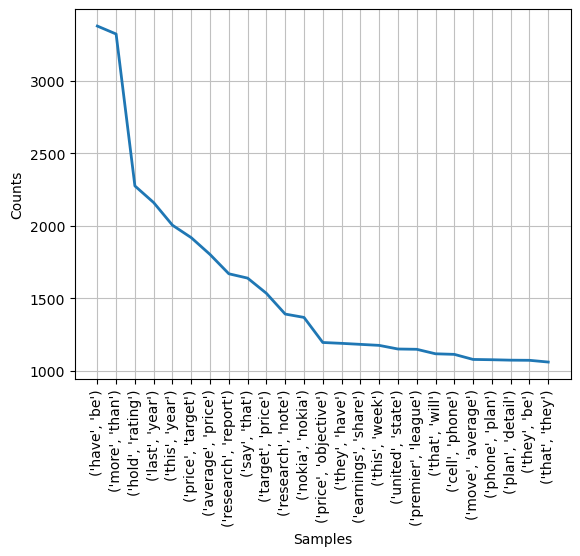

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
bigrams = list(nltk.bigrams(word_list))
freqdist = nltk.FreqDist(bigrams)
print( "The top 25 bigrams and their corresponding frequencies are: \n", freqdist.most_common(25))
freqdist.plot(25)

Part B-3: Sentiment Analysis
=====

##### The third part in Part B are computed together. We are looking for the total number of positive and negative words in the corpus, as well as the number of positive and negative news stories in the text.
Firstly, we read the given documents "positive-words.txt" and "negative-words.txt" into two word lists. The first 35 lines of the two documents are for declaration and are removed in our code.
<br>
The *story_list* in Part A-2 is used here. We match the words in each story line with the words in the positive and negative word lists. If a word is included in any of the lists, 1 is added to the corresponding word number counters. If there are more positive words in one story line than negative words or vice versa, 1 is added to the corresponding story number counters. The final results are computed as follows.

In [10]:
import sys
encode = sys.getdefaultencoding()
positive_file = open('positive-words.txt', 'rt', encoding = encode, errors='ignore').read().split('\n')[35:2042]
negative_file = open('negative-words.txt', 'rt', encoding = encode, errors='ignore').read().split('\n')[35:4818]

story_positive = 0
story_negative = 0
count_positive = 0
count_negative = 0
for i in story_list:
	i_word_list = re.findall(r'\S+', i)
	mylist_positive = [x for x in i_word_list if x in positive_file]
	mylist_negative = [x for x in i_word_list if x in negative_file]
	count_positive += len(mylist_positive)
	count_negative += len(mylist_negative)
	if len(mylist_positive) > len(mylist_negative) :
		story_positive += 1
	elif len(mylist_positive) < len(mylist_negative) :
		story_negative +=1
## number of positive and negative words
print("The number of positive words in the corpus is:", count_positive)
print("The number of positive words in the corpus is:", count_negative)

The number of positive words in the corpus is: 168169
The number of positive words in the corpus is: 140830


We then print the number of news stories with more positive that negative words and the number of news stories with more negative than positive words.
<br>
It is worth noticing that there are more positive news stories overall in the given corpus.

In [11]:
## number of positive and negative stories
print("The number of news stories with more positive words is:", story_positive)
print("The number of news stories with more negative words is:", story_negative)

The number of news stories with more positive words is: 10187
The number of news stories with more negative words is: 7079


Part C: Language Models
=====

##### In Part C, we want to compute a language model for bigrams based on the first 16000 rows in the corpus.
We use a downloaded function in "nltk", called "ConditionalFreqDist", which automatically calculate the conditional frequency distributions of each bigram. We then select the next word with the highest conditional frequency based on the former words. The final 10-word language model is as follows.

In [12]:
conddist = nltk.ConditionalFreqDist(bigrams)
def final_model(word):
	final_model = []
	for i in range(10):
		final_model.append(word)
		word = conddist[word].most_common(1)[0][0]
	print("The generated 10-word model is: \n", ' '.join(final_model))
final_model("they")

The generated 10-word model is: 
 they have be able take place where they have be
